## 1. Cuestiones sobre circuitos y caminos eulerianos

1. Tras las funciones anteriores nos hemos dado cuenta de que las mismas no tratan sobre grafos NO dirigidos. Indicar brevemente que cambios harían falta, si alguno, para que nuestras funciones pudieran buscar caminos y circuitos eulerianos en tales grafos.

  Habría que modificar la función **adj_inc_directed_multigraph**, puesto que para encontrar caminos y circuitos eulerianos sobre grafos no dirigidos, basta con calcular el grado de cada nodo.
Asimismo, habría que cambiar las funciones **isthere_euler_path_multigraph** y **isthere_euler_circuit_multigraph**. En el caso de un camino, debería comprobar que todos los nodos tienen grado par excepto dos, en el caso de un circuito que todos los nodos tienen grado par.
La función **first_last_euler_path_directed_multigraph** debería ahora devolver indistintamente los dos nodos con grado impar.

2. El criterio sobre existencia de caminos o circuitos eulerianos solo funciona cuando el grafo no contiene subgrafos disjuntos. ¿Como podríamos detectar dicha condicion? 

Podríamos determinarlo construyendo la matriz de adyacencia del grafo y estudiando si esta es por bloques, en ese caso, en el grafo aparecen subgrafos disjuntos.

## 2. Cuestiones sobre recontrucción de secuencias

1. Si se tiene una secuencia P de longitud $l_{P}$ y se usan lecturas (reads) de longitud $l_{R}$ para reconstruirlas mediante un camino o circuito euleriano sobre un grafo $G = (V, E)$, queremos estudiar cuantos nodos $|V|$ y cuantas ramas $|E|$ hay y cual sería el sparsity factor $\rho$.
Para ello vamos a hacer un pequeño estudio experimental de estas cantidades, fijando una longitud $l_{P}$ suficientemente grande y estimando el numero de vértices, ramas y el sparsity factor para diferentes valores de $l_{R}$. Escribir una funcion Python que estime dichos numeros de vértices, ramas y sparsity factor, describir sus resultados y comentarlos. 

In [38]:
import grafos02 as sq
lp = 1000
N = 20
ed = []
nd = []
rho = []
for lr in range(3,20, 1):
    num_nodes = 0
    num_edges = 0
    for _ in range(N):
        sequence = sq.random_sequence(lp)
        spectr = sq.spectrum(sequence, lr)
        spectr2 = sq.spectrum_2(spectr)
        num_nodes += len(spectr2)
        d_mg = sq.spectrum_2_graph(spectr)
        num_edges += sum([len([d_mg[i][j]]) for i in d_mg.keys() for j in d_mg[i].keys()])
    num_edges /= N
    num_nodes /= N
    ed.append(num_edges)
    nd.append(num_nodes)
    rho.append(num_edges/num_nodes**2)

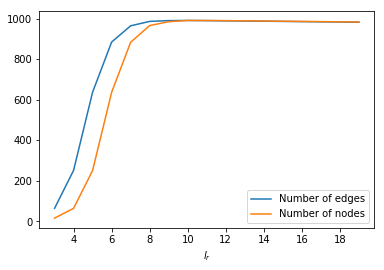

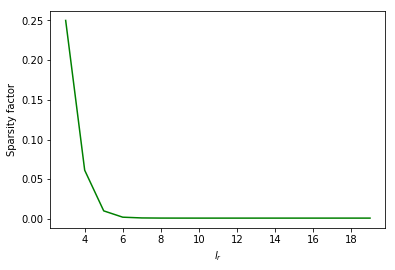

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(3,20,1), ed, label="Number of edges")
plt.plot(range(3,20,1), nd, label="Number of nodes")
plt.xlabel("$l_{r}$")
plt.legend()
plt.show()
plt.plot(range(3,20,1), rho, color="g")
plt.xlabel("$l_{r}$")
plt.ylabel("Sparsity factor")
plt.show()

Hemos decidido representar los resultados en una gráfica para mostrar la relación entre $l_{R}$ y las diferentes cantidades que se piden.
Podemos observar que en la primera gráfica el número de ramas y de nodos crece rápidamente hasta aproximadamente el valor $l_{R}=8$, a partir del cual se mantiene aproximadamente constante. Esto se debe a que el $(l_{R}-1)$-espectro se reduce mucho cuando usamos longitudes de reads pequeñas, ya que las secuencias de letras se repiten mucho. Sin embargo cuando el read es muy largo, es mucho menos probable que se repitan las secuencias en el $(l_{R})-1$-espectro.
Para longitudes de read pequeñas, el número de nodos y de ramas difieren más que para longitudes grandes, donde son prácticamente iguales. Esto se debe a que para longitudes pequeñas, al repetirse las secuencias, el número de nodos es bajo, pero el de ramas no, mientras que al aumentar el número de nodos el de ramas se ve reducido.
El sparsity factor refleja este comportamiento, decreciendo cuando el valor del número de nodos y ramas se aproximan.

2. El coste de reconstruir una secuencia no solo depende de la búsqueda de un camino euleriano sino también del tiempo empleado en la construcción del grafo. Discutir los costes asociados a las funciones spectrum(sequence, len_read), spectrum_2(spectr) y spectrum_2_undirected_graph(spectr) definidas más arriba de acuerdo a la implementación que se haya seguido y, en consecuencia, el coste total del algoritmo de reconstruccion de secuencias.

* **spectrum**: Si tenemos una cadena de longitud $P$ y queremos generar su $R$-espectro, en total generaremos $P-R+1$ subcadenas. Por lo tanto el coste es $O(P-R)$
* **spectrum_2**: Para generar el $(R-1)$-espectro, tenemos que recorrer todo el $R$-espectro, por lo tanto el coste es de nuevo $O(P-R)$
* **spectrum_2_undirected_graph**: Para generar el grafo tenemos que recorrer el $(R-1)$-espectro, que en el caso peor, si no se repite ninguna subcadena, tendrá coste $O(P-R)$. Por cada subcadena del $(R-1)$-espectro, tenemos que recorrer el $R$-espectro para encontrar sus vecinos. Por tanto el coste total es $O((P-R)^2)$

Para obtener el coste total del algoritmo de reconstrucción de secuencias nos queda sumar el coste del algoritmo para encontrar caminos eulerianos, que tiene coste lineal en el número de ramas, en este caso $O(P-R)$. Como el coste de creación de los diccionarios es cuadrático, obtenemos un coste final $O(P-R)$.